In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from matplotlib.ticker import PercentFormatter
import math

In [63]:
pd.set_option('display.max_columns', None)
df = pd.read_excel("D:\Machine learning\coding\premimums_rest.xlsx")
print(df.shape)
df.head(5)


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9476\2365608293.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_excel("D:\Machine learning\coding\premimums_rest.xlsx")


(29904, 13)


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [64]:
df.columns=df.columns.str.replace(' ','_').str.lower()
df.head(1)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [65]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [66]:
df.dropna(inplace=True)
print(df.isna().sum())

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64


In [67]:
print(df.duplicated().sum())  #### it will give total number of duplicated rows
df.drop_duplicates(inplace=True)  ### if duplicated rows are present use this to drop them
df.duplicated().sum()

0


0

In [68]:
df.describe()


,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [69]:
df[df.number_of_dependants<0].shape


(50, 13)

In [70]:
print(df[df.number_of_dependants<0].number_of_dependants.unique())

[-1 -3]


In [71]:
df.number_of_dependants = abs(df.number_of_dependants)
print(df.number_of_dependants.describe())

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64


In [72]:
numeric_columns =df.select_dtypes(['Float64','int64']).columns
print(numeric_columns)

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')


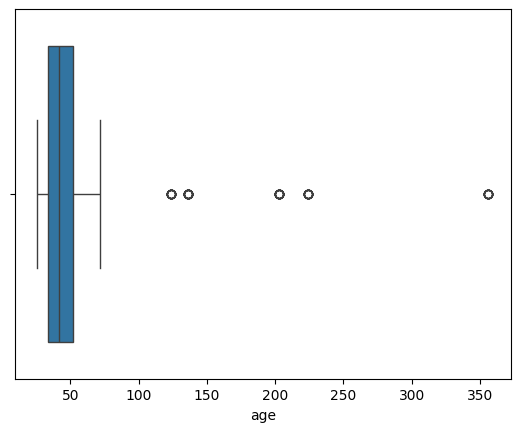

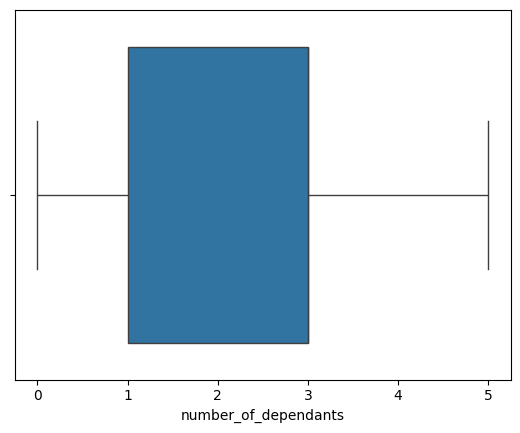

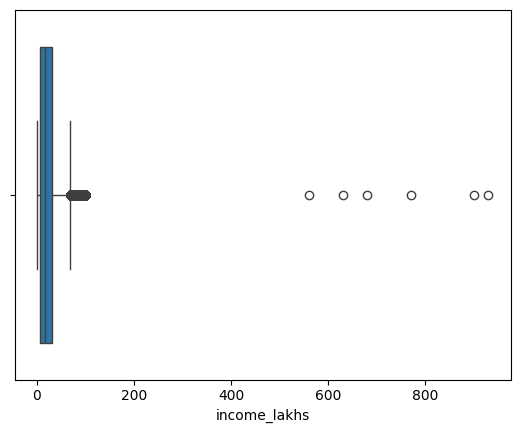

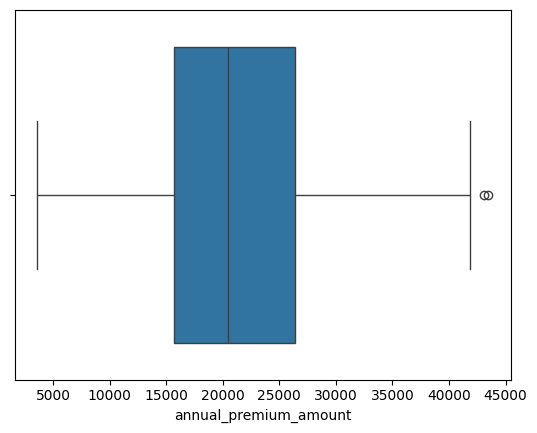

In [73]:
for col in numeric_columns:   ### boxplot is use to detect outliers
   sns.boxplot(x=df[col])
   plt.show()

In [74]:
print(df[df.age>100].age.unique())


[224 124 136 203 356]


In [75]:
df1 = df[df.age<=100].copy()
print(df1.describe())


                age  number_of_dependants  income_lakhs  annual_premium_amount
count  29828.000000          29828.000000  29828.000000           29828.000000
mean      43.095380              2.387790     23.371530           20901.900563
std       11.041991              1.420641     24.751262            6928.457636
min       26.000000              0.000000      1.000000            6538.000000
25%       34.000000              1.000000      7.000000           15706.000000
50%       42.000000              3.000000     17.000000           20496.000000
75%       52.000000              3.000000     32.000000           26361.000000
max       72.000000              5.000000    930.000000           43471.000000


In [76]:
print(df1.income_lakhs.quantile([0.25,0.75]))

def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5 *IQR
    upper_bound = Q1 +1.5 *IQR
    return lower_bound,upper_bound

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64


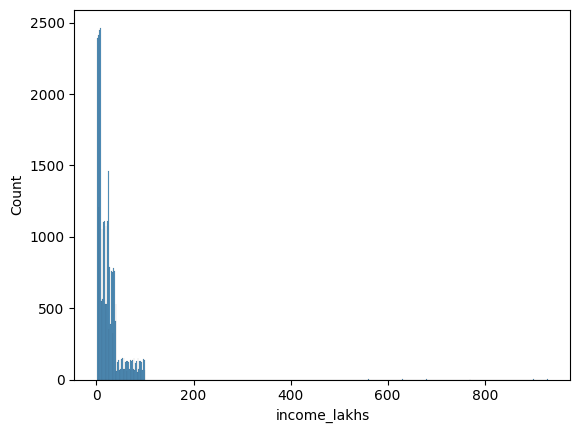

In [77]:

sns.histplot(df1.income_lakhs)
plt.show()

In [78]:
quantile_threshold = df.income_lakhs.quantile(0.999)
print(quantile_threshold)

100.0


In [79]:
print(df1[df1. income_lakhs> quantile_threshold].shape)


(6, 13)


In [80]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
print(df2.describe())

                age  number_of_dependants  income_lakhs  annual_premium_amount
count  29822.000000          29822.000000  29822.000000           29822.000000
mean      43.094896              2.387734     23.226343           20900.689223
std       11.042430              1.420644     22.455408            6928.192115
min       26.000000              0.000000      1.000000            6538.000000
25%       34.000000              1.000000      7.000000           15705.250000
50%       42.000000              3.000000     17.000000           20495.500000
75%       52.000000              3.000000     32.000000           26360.000000
max       72.000000              5.000000    100.000000           43471.000000


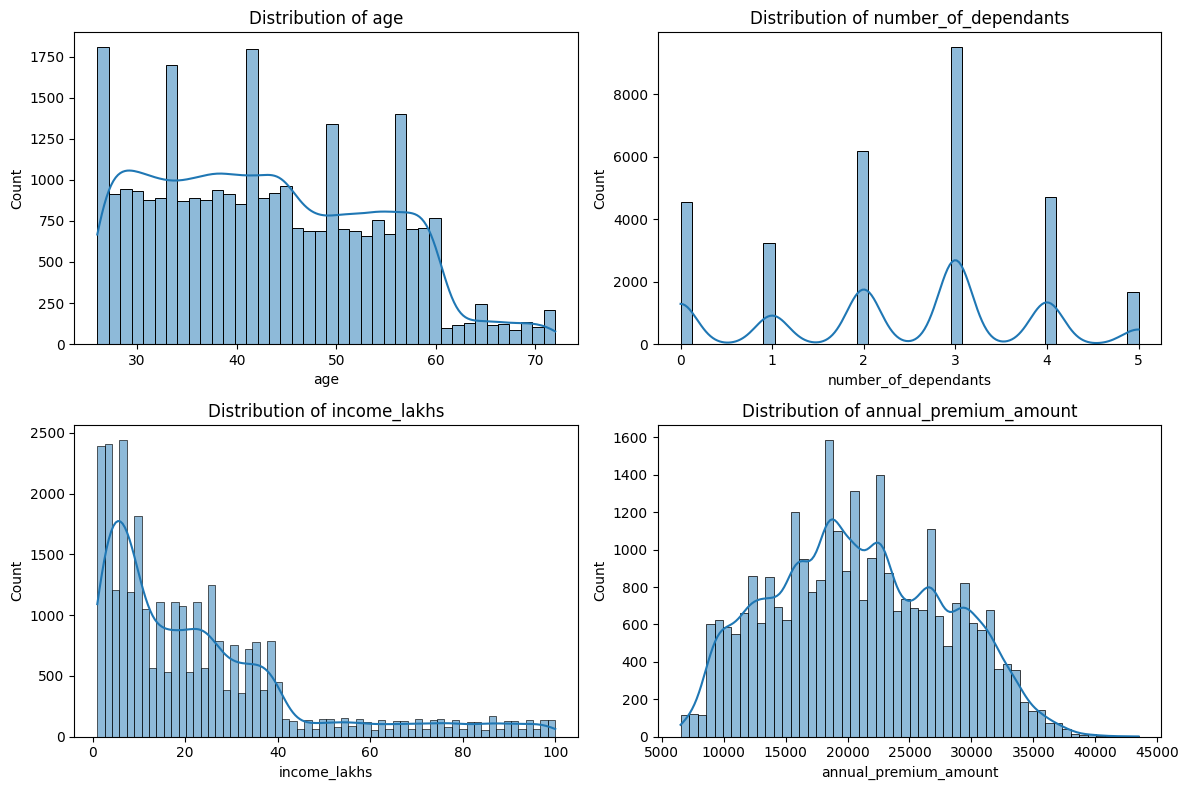

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten to easily index


for i, col in enumerate(numeric_columns[:4]):  # Make sure to use only 4 columns
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


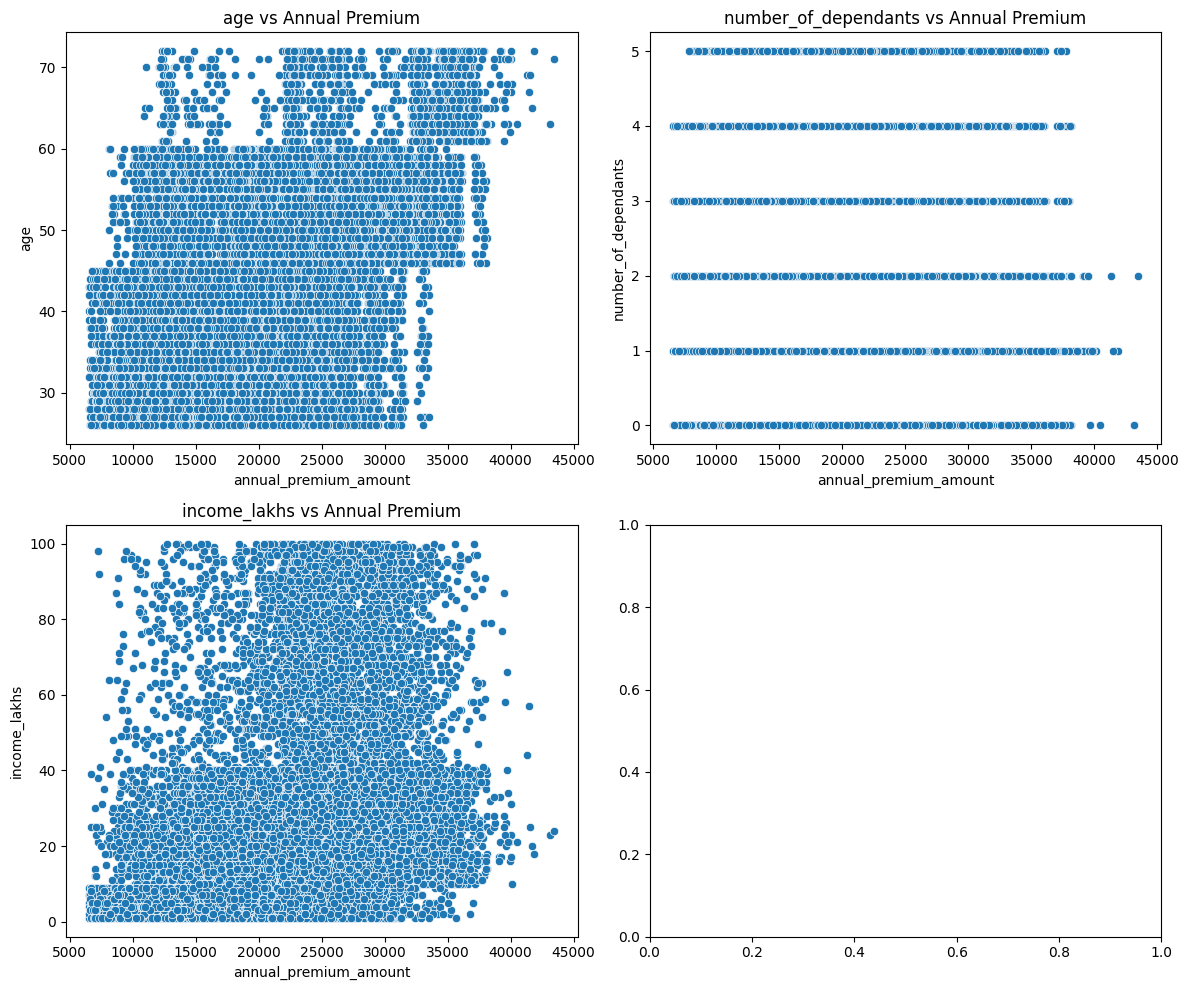

In [82]:
from itertools import combinations

y_columns = [col for col in numeric_columns if col != 'annual_premium_amount'][:4]  # First 4

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(y_columns):
    sns.scatterplot(data=df2, x='annual_premium_amount', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Annual Premium')

plt.tight_layout()
plt.show()

In [83]:
categorical_cols = [ 'gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level','medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [84]:
df2["smoking_status"].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Not Smoking': 'No Smoking'
},inplace=True)

C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9476\2141785160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["smoking_status"].replace({


In [85]:
print(df2.smoking_status.unique())

['No Smoking' 'Regular' 'Occasional']


In [86]:

pct_count =df2.gender.value_counts(normalize=True)
print(pct_count)

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64


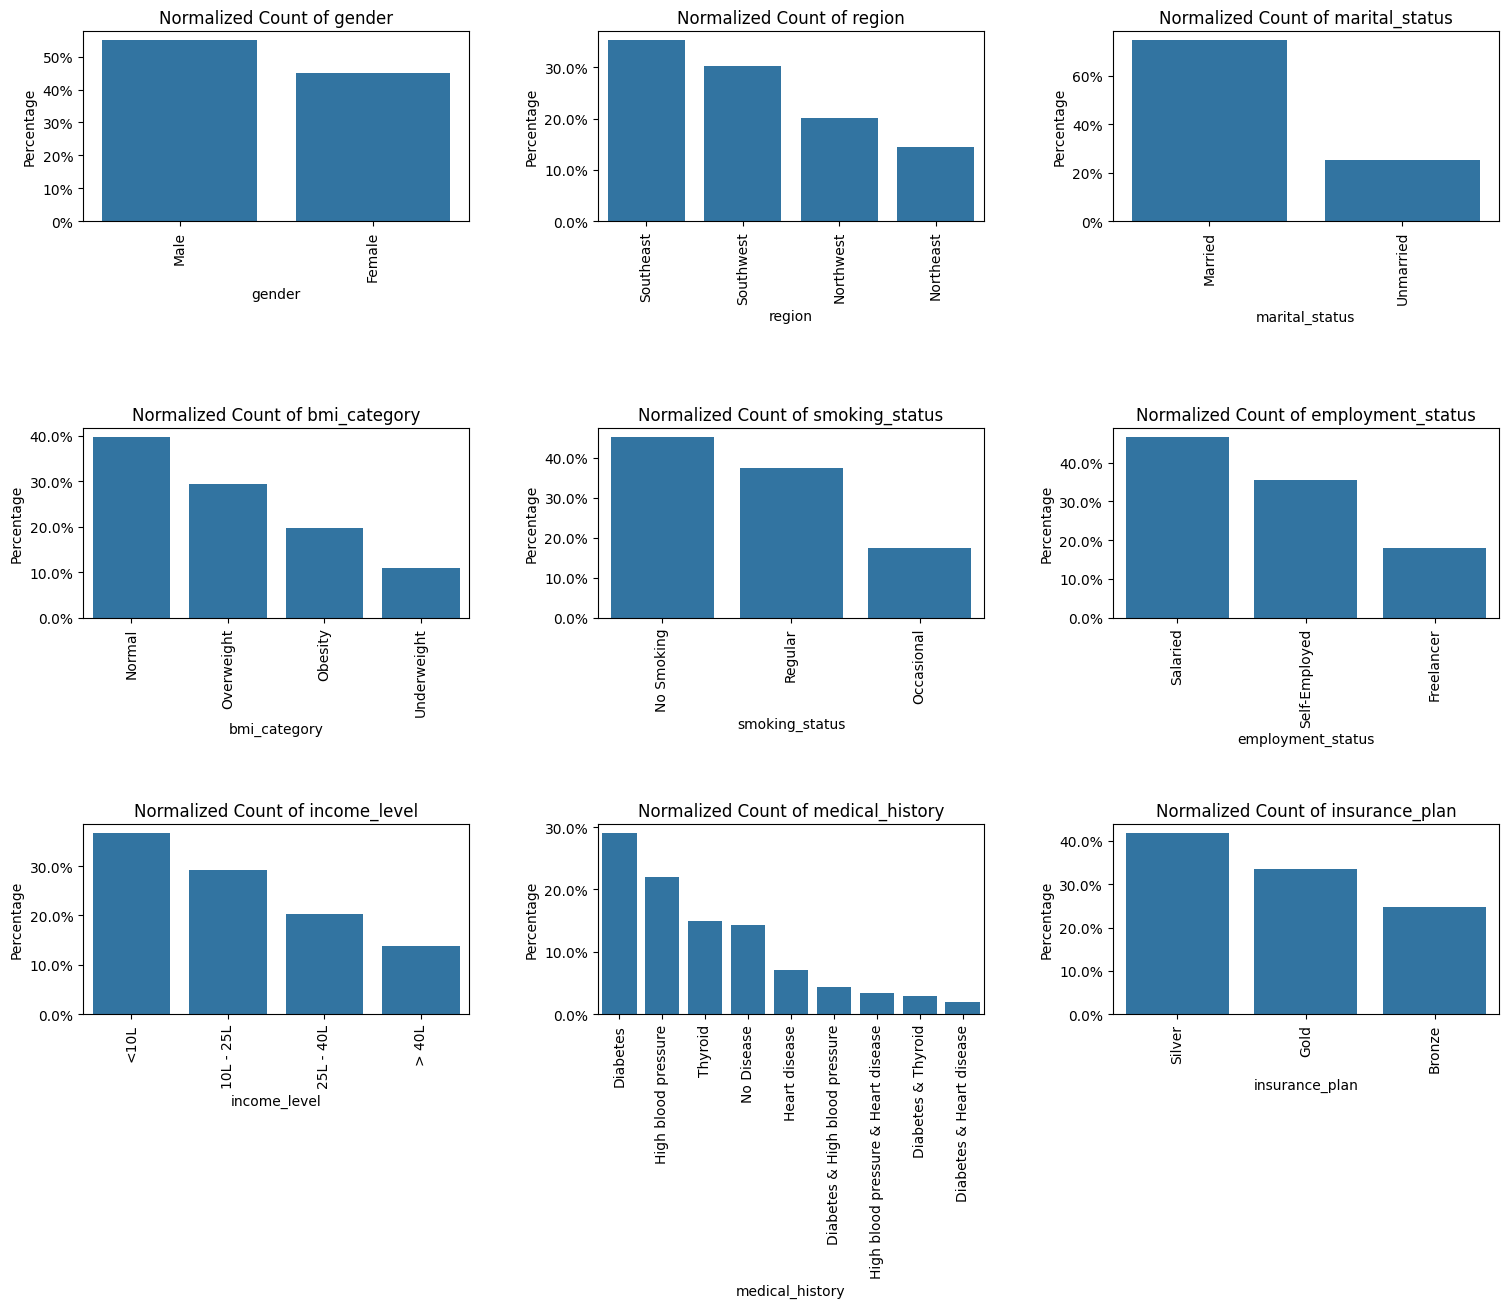

In [87]:
# Set up a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(16, 14))  # Increased figure size
axes = axes.flatten()

# Plot each column's normalized value counts
for i, col in enumerate(categorical_cols):
    normalized_counts = df2[col].value_counts(normalize=True).reset_index()
    normalized_counts.columns = [col, 'percentage']
    
    sns.barplot(data=normalized_counts, x=col, y='percentage', ax=axes[i])
    axes[i].set_title(f'Normalized Count of {col}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate labels for better readability
    axes[i].set_ylabel('Percentage')
    axes[i].yaxis.set_major_formatter(PercentFormatter(1.0))  # Format y-axis as percent

# Adjust layout to avoid overlap
plt.tight_layout(pad=4.0)  # Increase padding between plots
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


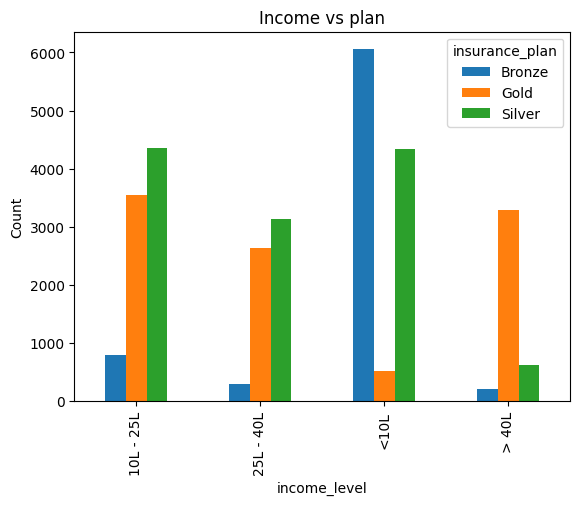

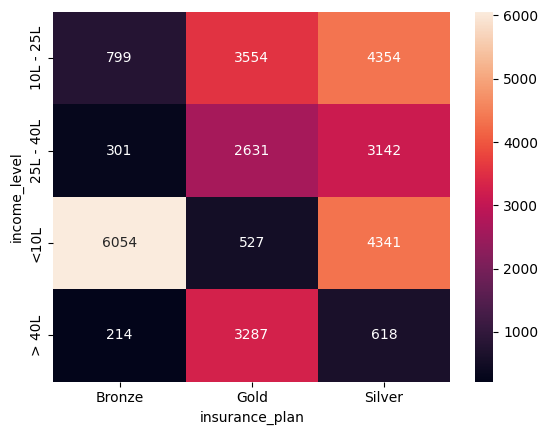

In [88]:
crosstab=pd.crosstab(df2.income_level,df2.insurance_plan )
print(crosstab)

crosstab.plot(kind="bar")
plt.title("Income vs plan")
plt.ylabel("Count")
plt.show()

sns.heatmap(crosstab,annot=True,fmt="d")
plt.show()

In [89]:
print("\n")
risk_scores = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [90]:
# Split medical_history into two disease columns
df2[["diseases1", "diseases2"]] = (
    df2['medical_history']
    .str.lower()
    .str.split("&", expand=True)
    .apply(lambda x: x.str.strip())
)


In [91]:

# Fill missing values with 'none'
df2['diseases1'].fillna('none', inplace=True)
df2['diseases2'].fillna('none', inplace=True)

C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9476\4226983708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['diseases1'].fillna('none', inplace=True)
C:\Users\Shiwan\AppData\Local\Temp\ipykernel_9476\4226983708.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [92]:
# CALCULATING TOTAL_RISK_SCORE
df2['total_risk_score'] = 0
for disease_col in ['diseases1', 'diseases2']:
    df2['total_risk_score'] += df2[disease_col].map(risk_scores)

In [93]:
# Output min and max
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
print("Max score:", max_score)
print("Min score:", min_score)

Max score: 14
Min score: 0


In [94]:
#### NORMALIZED RISK SCORE
df2['normalized_risk_score'] = (df2["total_risk_score"] - min_score) / (max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,diseases1,diseases2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [95]:
#### LABLE ENCODING OF INSURANCE_PLAN
print(df2.insurance_plan.unique())
print('\n')
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
print(df2.insurance_plan.unique())

['Bronze' 'Silver' 'Gold']


[1 2 3]


In [96]:
##### LABLE ENCODING OF INCOME_LEVEL
print('\n')
print(df2.income_level.unique())
df2['income_level'] = df2['income_level'].map({'<10L':1 , '10L - 25L':2 , '25L - 40L':3,'> 40L':4 })
print(df2.income_level.unique())
df2.head()



['<10L' '10L - 25L' '> 40L' '25L - 40L']
[1 2 4 3]


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,diseases1,diseases2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,diabetes,none,6,0.428571


In [97]:
##### ONE HOT ENCODING
print('\n')
print('\n')
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 =pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,diseases1,diseases2,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,diabetes,none,6,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [98]:
### DROPPING UNUSEFULL COLUMNS

df4 = df3.drop(['medical_history','diseases1', 'diseases2','total_risk_score' ],axis= 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


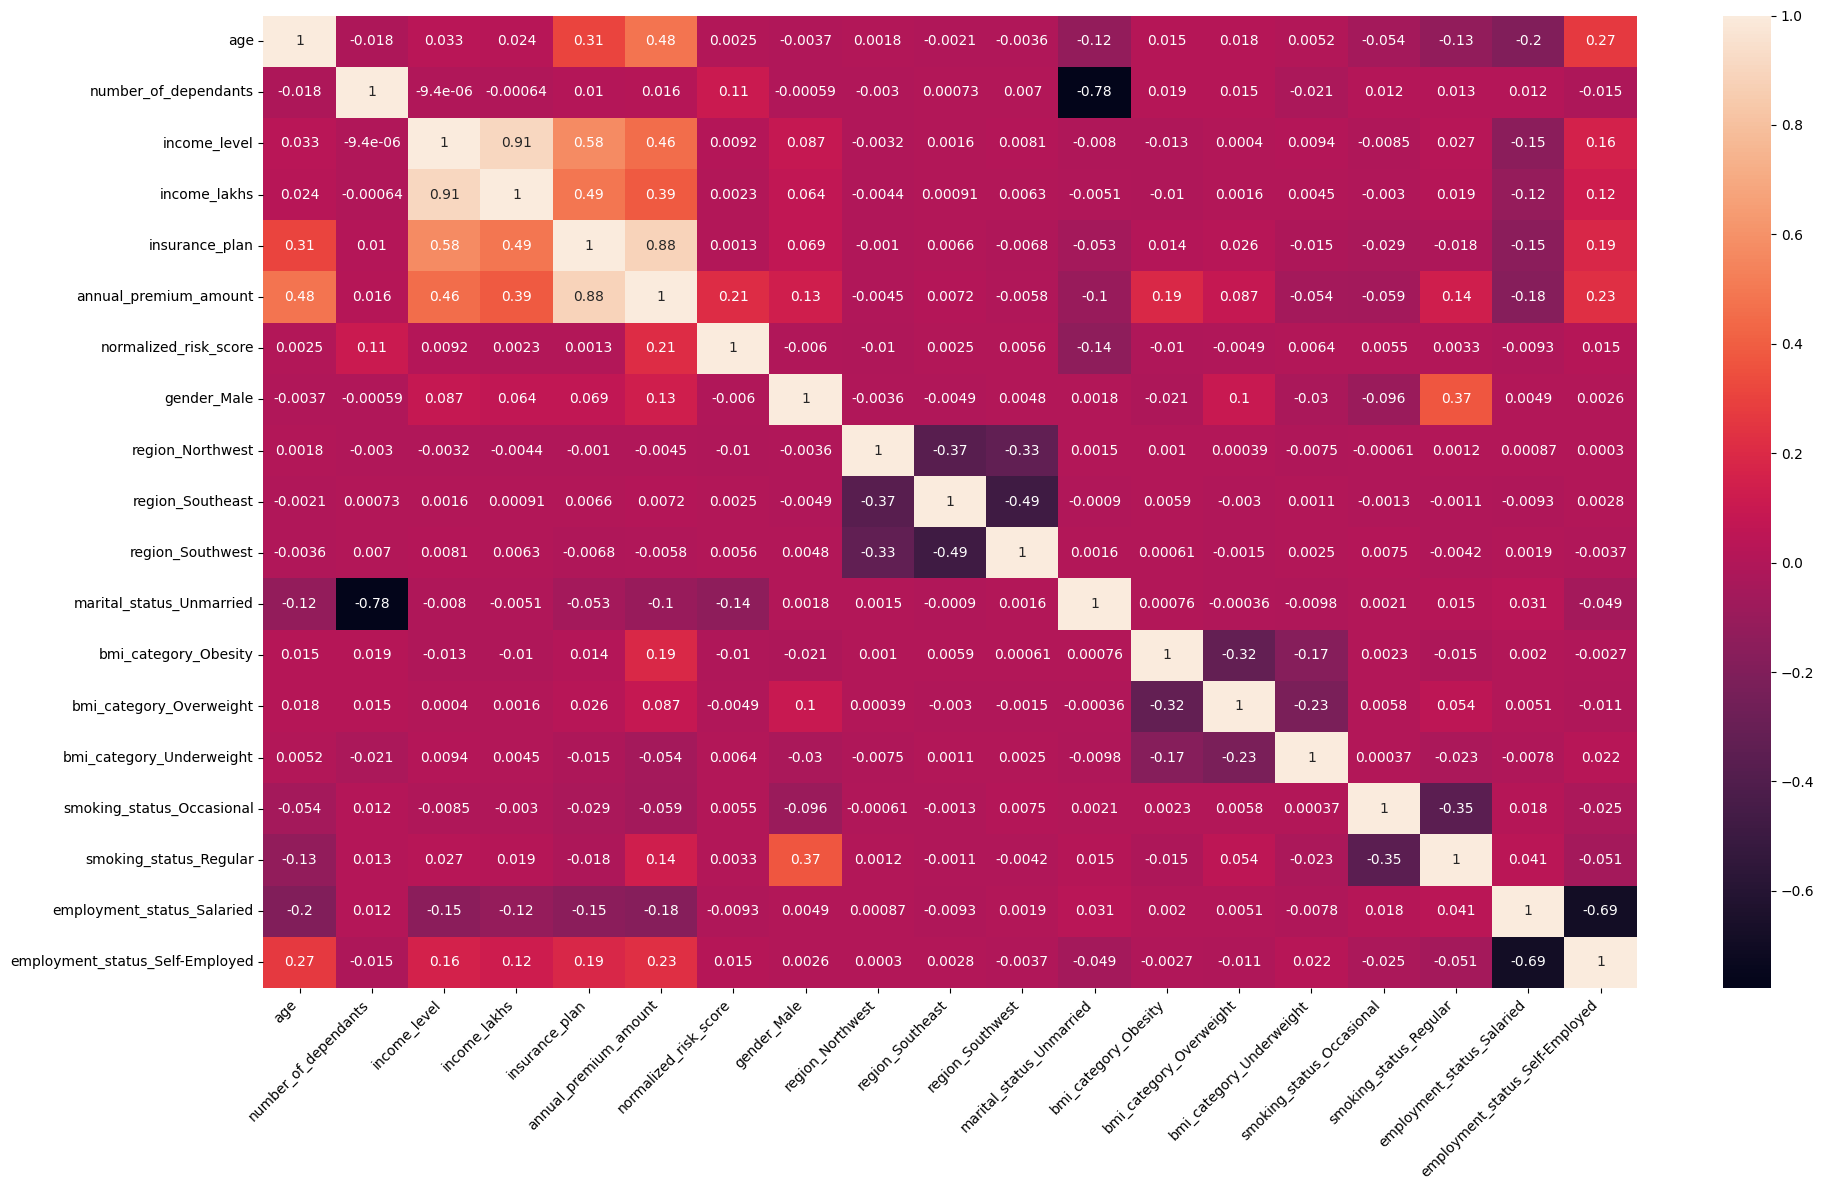

In [99]:
### HEAT MAP OF DATAFRAME
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [100]:
###### SCALING DATA BY MINMAXSCALER
X = df4.drop("annual_premium_amount",axis='columns')
Y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()
X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.head()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [101]:
X.drop(columns=['income_level'],axis=1)


,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,0.739130,0.6,0.252525,1.0,0.428571,0,1,0,0,0,0,0,0,0,0,0,1
29900,0.304348,0.0,0.151515,1.0,0.785714,0,0,1,0,1,0,1,0,0,1,1,0
29901,0.239130,0.0,0.030303,0.0,0.000000,0,1,0,0,1,1,0,0,0,0,1,0
29902,0.456522,0.4,0.818182,1.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0


In [102]:

#### CALCULATING VIF
print('\n')
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

print(calculate_vif(X))
print('\n')
print(calculate_vif(X.drop('income_level',axis= "columns")))



                           Variable        VIF
0                               age   3.921783
1              number_of_dependants   6.278938
2                      income_level  13.890522
3                      income_lakhs  11.185596
4                    insurance_plan   5.271297
5             normalized_risk_score   3.810619
6                       gender_Male   2.599098
7                  region_Northwest   2.123965
8                  region_Southeast   2.980842
9                  region_Southwest   2.710097
10         marital_status_Unmarried   2.346288
11             bmi_category_Obesity   1.478248
12          bmi_category_Overweight   1.735085
13         bmi_category_Underweight   1.255611
14        smoking_status_Occasional   1.378264
15           smoking_status_Regular   2.131638
16       employment_status_Salaried   3.177473
17  employment_status_Self-Employed   2.871687


                           Variable       VIF
0                               age  3.863055
1          

In [104]:
X_reduced = X.drop("income_level",axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
###  LinearRegression
print('\n')
X_train,X_test,y_train,y_test = train_test_split(X_reduced,Y,test_size=0.3,random_state=10)

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
test_score = model_lr.score(X_test,y_test) ## 92.80%
print(test_score)
train_score = model_lr.score(X_train,y_train)
print(train_score)
print('\n')
print(model_lr.coef_)
print(model_lr.intercept_)



0.9538448451629948
0.9534163989489616


[ 7016.23932829 -1311.76470171  -708.19336921 14835.98820801
  6053.6241234     37.55826883   -55.25087215   -19.62254288
   -22.28967559  -700.32019985  3926.8127061   1979.45604663
   612.86623617   837.3951011   2800.66184334   -45.49136706
   243.07842087]
5935.981289344605


In [106]:
feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
print(coef_df)
coef_df = coef_df.sort_values(by='Coefficients')
print(coef_df)

                                 Coefficients
age                               7016.239328
number_of_dependants             -1311.764702
income_lakhs                      -708.193369
insurance_plan                   14835.988208
normalized_risk_score             6053.624123
gender_Male                         37.558269
region_Northwest                   -55.250872
region_Southeast                   -19.622543
region_Southwest                   -22.289676
marital_status_Unmarried          -700.320200
bmi_category_Obesity              3926.812706
bmi_category_Overweight           1979.456047
bmi_category_Underweight           612.866236
smoking_status_Occasional          837.395101
smoking_status_Regular            2800.661843
employment_status_Salaried         -45.491367
employment_status_Self-Employed    243.078421
                                 Coefficients
number_of_dependants             -1311.764702
income_lakhs                      -708.193369
marital_status_Unmarried          

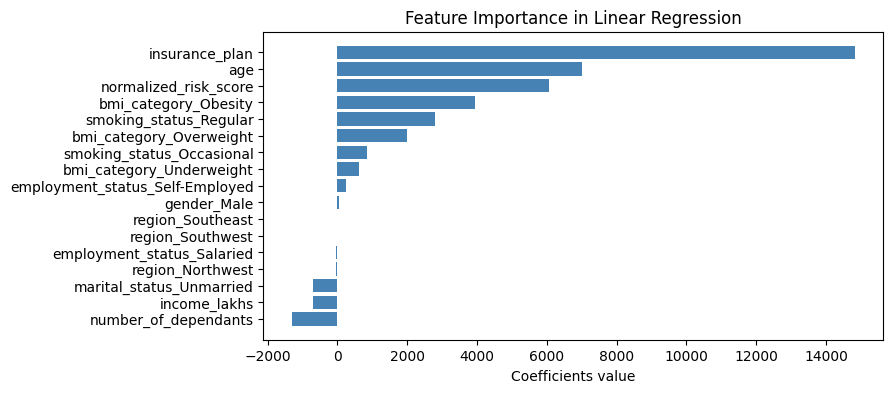

In [107]:
#ploting bar graph of maximum weightage
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color = "steelblue")
plt.xlabel("Coefficients value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [108]:

#### RIDGE MODEL
model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score = model_rg.score(X_train,y_train)
test_score = model_rg.score(X_test,y_test)
print(train_score,test_score)

0.9534162332209687 0.9538456995663842


In [109]:
# #### XGBOOT REGRESSION MODEL

from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score = model_xgb.score(X_train,y_train)
test_score = model_xgb.score(X_test,y_test)
print(train_score,test_score)  ## 99.80 %

0.9986370801925659 0.9979538321495056


In [111]:
##### RANDOM SEARCH CV (MODEL FINING AND TUNING)
model_xgb = XGBRegressor()
param_grid = {
    'n_estimator':[20,40,50],
    'learning_rate' :[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}
random_search = RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=42)
random_search.fit(X_train,y_train)
print(random_search.best_score_)
print(random_search.best_params_)

c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Shiwan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:48] WARNING: C:\actions-runner\_wor

0.9981012145678202
{'n_estimator': 40, 'max_depth': 5, 'learning_rate': 0.1}


In [112]:
best_model = random_search.best_estimator_

feature_importance = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance,index = X_test.columns,columns=['Coefficients'])
print(coef_df)
coef_df = coef_df.sort_values(by='Coefficients')
print(coef_df)

                                 Coefficients
age                                  0.031653
number_of_dependants                 0.000018
income_lakhs                         0.000017
insurance_plan                       0.861651
normalized_risk_score                0.025786
gender_Male                          0.000015
region_Northwest                     0.000025
region_Southeast                     0.000014
region_Southwest                     0.000011
marital_status_Unmarried             0.000018
bmi_category_Obesity                 0.030182
bmi_category_Overweight              0.016169
bmi_category_Underweight             0.001376
smoking_status_Occasional            0.004301
smoking_status_Regular               0.028727
employment_status_Salaried           0.000018
employment_status_Self-Employed      0.000019
                                 Coefficients
region_Southwest                     0.000011
region_Southeast                     0.000014
gender_Male                       

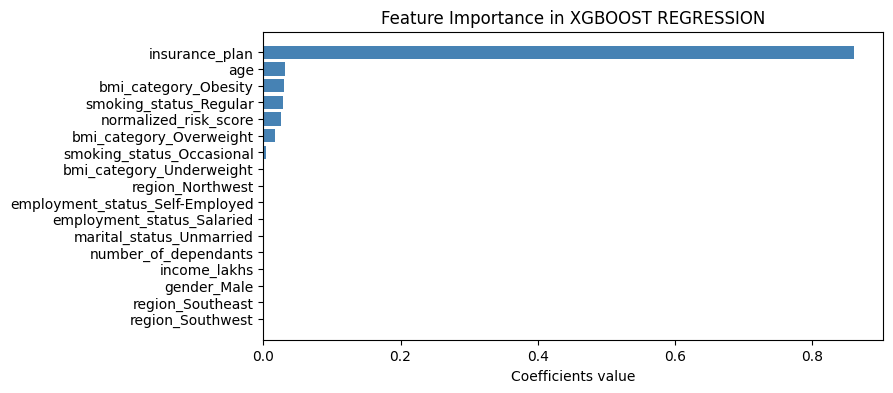

In [113]:
#ploting bar graph of maximum weightage
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'],color = "steelblue")
plt.xlabel("Coefficients value")
plt.title("Feature Importance in XGBOOST REGRESSION")
plt.show()

       actual     predicted        diff  diff_pct
19713   26895  26575.996094 -319.003906 -1.186109
14750   22734  23002.570312  268.570312  1.181360
19932   21198  21546.892578  348.892578  1.645875
29643    9100   9120.255859   20.255859  0.222592
17076   26434  26575.101562  141.101562  0.533788


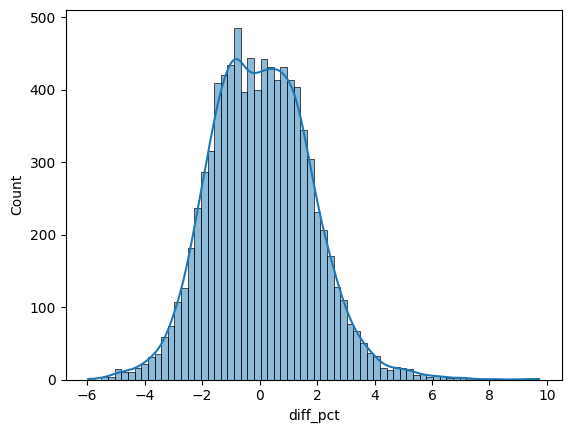

In [114]:
#### ERROR ANALYSIS
y_pred  = best_model.predict(X_test)
residual = y_pred-y_test
residual_pct = (residual*100)/y_test

resultant_df = pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_pred,
    "diff" : residual ,
    "diff_pct" : residual_pct
})

print(resultant_df.head())

sns.histplot(resultant_df['diff_pct'],kde = True)
plt.show()